# **Project Name**



## **Hotel Booking Cancellation & Customer Behavior Analysis**

![My Logo](hotel.jpg)

##  **Project Summary –** 
### **Introduction**

The hotel industry handles thousands of bookings every day. Some customers cancel their reservations, some are repeat guests, and bookings vary by season and customer type. All these factors directly affect hotel revenue and management decisions.

In this project, Exploratory Data Analysis (EDA) is performed on the Hotel Booking Dataset, which contains booking information for both City Hotel and Resort Hotel. The dataset includes details such as arrival month, lead time, number of guests, country, market segment, room type, meal type, cancellation status, and Average Daily Rate (ADR).

The main objective of this analysis is to understand customer behavior, identify booking and cancellation patterns, determine peak booking periods, and generate useful insights that can help hotel management improve business strategies.

Using EDA techniques along with visualizations and statistical analysis, meaningful patterns, trends, and relationships within the data are identified to support better decision-making in the hotel industry.

### **Define Your Business Objective**

The main business objective of this project is to analyze hotel booking data to understand customer behavior, identify the reasons for booking cancellations, recognize seasonal demand patterns, and determine the factors that influence hotel revenue.

The goal is to generate meaningful insights from the data that can help hotel management:

Reduce booking cancellations

Improve customer retention and satisfaction

Identify peak and off-season periods

Optimize pricing strategies based on demand (ADR)

Focus on important customer segments and booking channels

These insights support better decision-making and help improve overall hotel performance and profitability.

### **Import Libraries**

In [103]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Set maximum columns to be display in datafram as 36
pd.set_option("display.max_columns", 36)


# Setting fontsizes,fontweight,label weight for lebels,titles.
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["legend.title_fontsize"] = 15

### **Dataset Loading**

In [104]:


file_path = r"C:\Users\Shree\Desktop\Hotel booking\hotel_bookings.csv"

# Load the CSV into a DataFrame
h_df = pd.read_csv(file_path)

print("CSV loaded successfully!")
print(h_df.head())  # Display first 5 rows


CSV loaded successfully!
          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2     

### **Dataset Rows & Columns count**

In [105]:
#Dataset Rows and Columns count
print('Number of rows:',h_df.shape[0])
print("Number of coulmns:",h_df.shape[1])

Number of rows: 119390
Number of coulmns: 32


In [106]:
# Dataset Info
h_df.info()
     


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### **Duplicate Values**

In [107]:
#Dataset Duplicate Value Count
print("Total Number of duplicate values:",h_df.duplicated().sum())
print(h_df.duplicated().value_counts())

Total Number of duplicate values: 31994
False    87396
True     31994
Name: count, dtype: int64


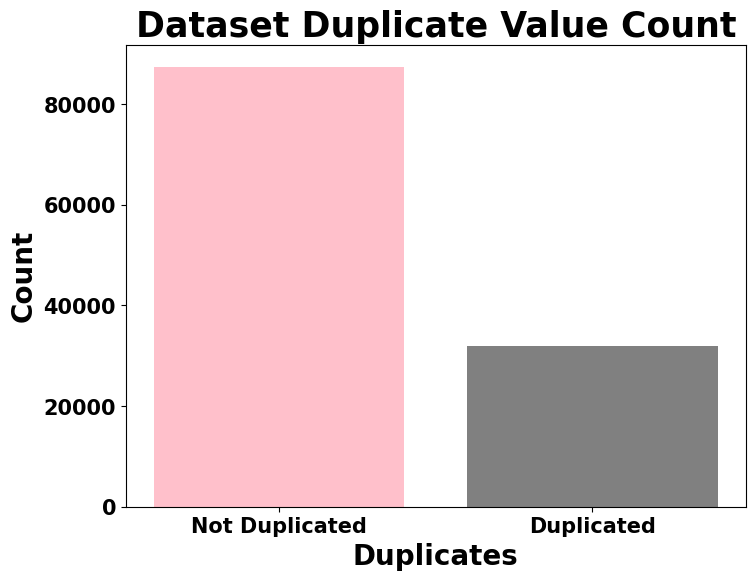

In [108]:


dup_counts = h_df.duplicated().value_counts()

plt.figure(figsize=(8,6))
plt.bar(
    ['Not Duplicated', 'Duplicated'],
    [dup_counts.get(False, 0), dup_counts.get(True, 0)],
    color=['pink', 'gray']
)

plt.title('Dataset Duplicate Value Count')
plt.xlabel('Duplicates')
plt.ylabel('Count')

plt.show()


### **Missing Values/Null Values**

In [109]:


# Missing Values/Null Values Count
print("Total Number of null values : ",h_df.isnull().sum())

Total Number of null values :  hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                     

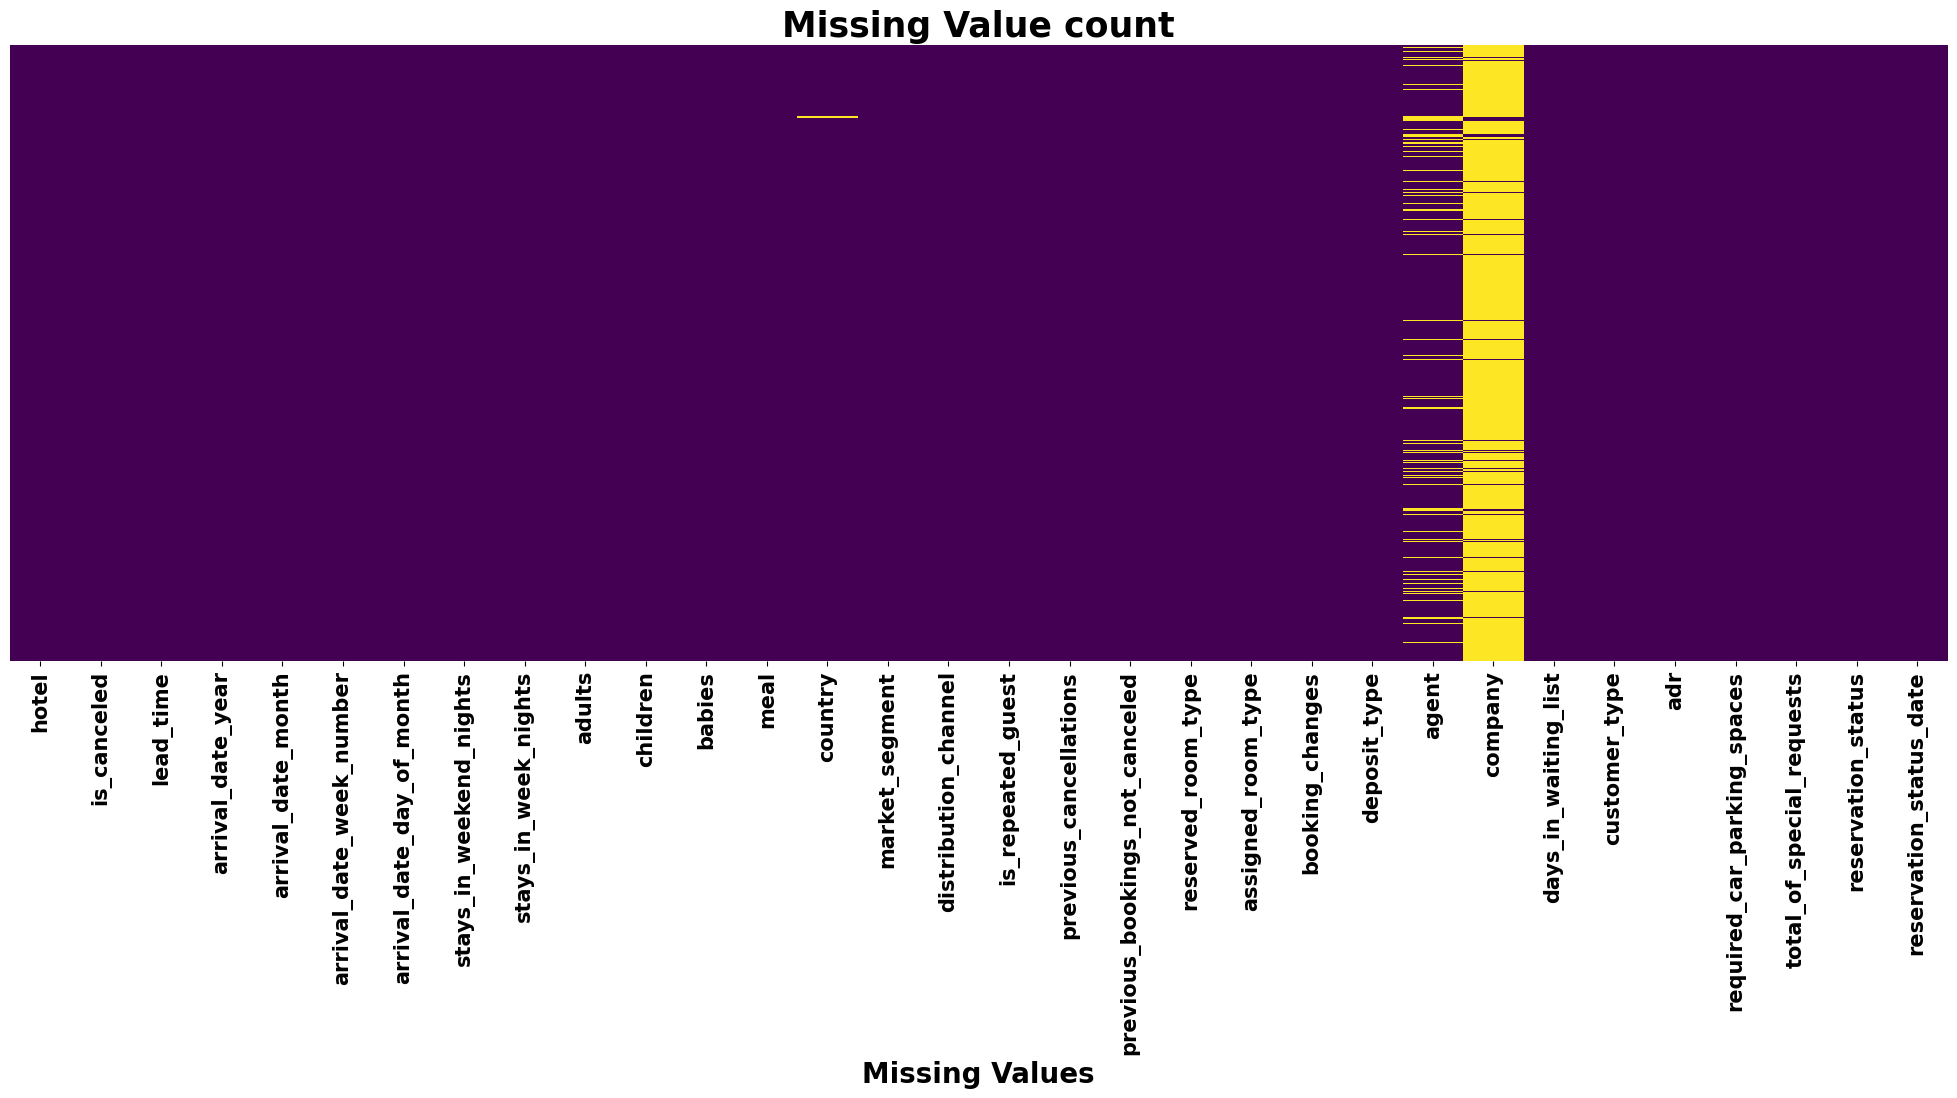

In [110]:

plt.figure(figsize=(25,8))
sns.heatmap(h_df.isnull(),cbar = False,yticklabels = False,cmap = 'viridis')
plt.xlabel('Missing Values')
plt.title('Missing Value count')
plt.show()

## What did you know about your dataset?
The dataset reveals distinct categories related to anomalies from a hotel's perspective, encompassing factors like company affiliation, lead time, distribution channels, and special guest requests—elements not typically observed. These insights signify significant shifts in prevailing conditions. Additionally, the dataset is characterized by an extensive array of rows and columns, punctuated by the presence of duplicate entries and missing values. Addressing these anomalies and discrepancies forms a critical component of our forthcoming data wrangling process

## **2. Understanding Your Variables**

In [111]:

# Dataset Columns
h_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [112]:

# Dataset Describe
h_df.describe()
     

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


### Check Unique Values for each variable.

In [113]:
##Check Unique Values for each variable.
for column in h_df.columns:
    print("Column:", column)
    print("Unique values:", h_df[column].unique())
    print()  # blank line for readability


Column: hotel
Unique values: ['Resort Hotel' 'City Hotel']

Column: is_canceled
Unique values: [0 1]

Column: lead_time
Unique values: [342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 338 167 310 148 165
 172 171 145 121 178 305 173 152 354 347 158 185 349 183 352 1

## Variables Description

- **hotel**: Type of hotel booked (Resort Hotel or City Hotel).
- **is_canceled**: Indicates whether the booking was canceled (1) or not (0).
- **lead_time**: Number of days between the booking date and the arrival date.
- **arrival_date_year**: Year of the arrival date.
- **arrival_date_month**: Month of the arrival date.
- **arrival_date_week_number**: Week number of the arrival date in the year.
- **arrival_date_day_of_month**: Day of the month of arrival.
- **stays_in_weekend_nights**: Number of weekend nights (Saturday/Sunday) booked.
- **stays_in_week_nights**: Number of weekdays (Monday to Friday) booked.
- **adults**: Number of adults included in the booking.
- **children**: Number of children included in the booking.
- **babies**: Number of babies included in the booking.
- **meal**: Type of meal plan booked (e.g., Breakfast, Half Board, Full Board).
- **country**: Country of origin of the guest.
- **market_segment**: Market segment of the booking (e.g., Online Travel Agency, Corporate).
- **distribution_channel**: Channel through which the booking was made (e.g., Travel Agent, Direct).
- **is_repeated_guest**: Indicates if the guest is a repeated guest (1) or not (0).
- **previous_cancellations**: Number of previous bookings canceled by the guest.
- **previous_bookings_not_canceled**: Number of previous bookings not canceled by the guest.
- **reserved_room_type**: Type of room reserved by the guest.
- **assigned_room_type**: Type of room assigned at check-in.
- **booking_changes**: Number of changes made in the booking before arrival.
- **deposit_type**: Type of deposit made (No Deposit, Refundable, Non-Refundable).
- **agent**: ID of the travel agency that made the booking.
- **company**: ID of the company that made the booking.
- **days_in_waiting_list**: Number of days the booking was in the waiting list.
- **customer_type**: Type of customer (Transient, Contract, Group).
- **adr**: Average Daily Rate (room price per day).
- **required_car_parking_spaces**: Number of parking spaces required by the guest.
- **total_of_special_requests**: Number of special requests made by the guest.
- **reservation_status**: Final status of the reservation (Checked-in, Canceled).
- **reservation_status_date**: Date when the last reservation status was updated.


## Check Unique Values for each variable.

In [114]:

unique_values = {}

for column in h_df.columns:

    unique_values[column] = sorted(h_df[column].astype(str).unique())

for column, values in unique_values.items():
    print(f"Unique values for '{column}':")
    print(values)
    print()

Unique values for 'hotel':
['City Hotel', 'Resort Hotel']

Unique values for 'is_canceled':
['0', '1']

Unique values for 'lead_time':
['0', '1', '10', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '11', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '12', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '13', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '14', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '15', '150', '151', '152', '153', '154', '155', '156', '157', '158', '159', '16', '160', '161', '162', '163', '164', '165', '166', '167', '168', '169', '17', '170', '171', '172', '173', '174', '175', '176', '177', '178', '179', '18', '180', '181', '182', '183', '184', '185', '186', '187', '188', '189', '19', '190', '191', '192', '193', '194', '195', '196', '197', '198', '199', '2', '20', '200', '201', '202', '203', '204', '205', '206', '207', '208', '209', '21', '210', 

#### Before commencing our data wrangling process, it's imperative to create a duplicate of our current dataset to document its original shape and to facilitate the comparison of any alterations made during the cleaning phase.



In [115]:
h1_df = h_df.copy()

## **3. Data Wrangling**

### Data Wrangling Code


#### Let's start with removing duplicate values

In [116]:
#removing duplicate values
h1_df = h1_df.drop_duplicates()


#### From the above plot we can see that we have an ample amount of missing values in some of the columns of our dataset which needs to be handled

In [117]:


for col in h1_df.select_dtypes(include='number').columns:
    h1_df[col] = h1_df[col].fillna(0)

# Fill categorical column
h1_df['country'] = h1_df['country'].fillna('others')


In [118]:

h1_df.isna().sum().sort_values(ascending=False).reset_index().rename(columns={'index':'Columns',0:'Null values'})

,Columns,Null values
0,hotel,0
1,is_canceled,0
2,lead_time,0
3,arrival_date_year,0
4,arrival_date_month,0
5,arrival_date_week_number,0
6,arrival_date_day_of_month,0
7,stays_in_weekend_nights,0
8,stays_in_week_nights,0
9,adults,0


In [119]:
#remove rows where total guests = 0
h1_df = h1_df[h1_df['adults'] + h1_df['babies'] + h1_df['children'] != 0]

# Check new shape
print(h1_df.shape)

(87230, 32)


###  Lets add some new columns to the dataset

In [120]:

# Total people in each booking
h1_df['total_people'] = h1_df['adults'] + h1_df['babies'] + h1_df['children']

# Total nights stayed
h1_df['total_stays'] = h1_df['stays_in_weekend_nights'] + h1_df['stays_in_week_nights']

# Check first 5 rows
h1_df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_people,total_stays
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,01-07-2015,2.0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,01-07-2015,2.0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,02-07-2015,1.0,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,02-07-2015,1.0,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,03-07-2015,2.0,2


In [121]:

h1_df['reserved_room_type'] = h1_df['reserved_room_type'].replace({
    'A': 'Single Room',
    'B': 'Double Room',
    'C': 'Twin Room',
    'D': 'Triple Room',
    'E': 'Quad Room',
    'F': 'Queen Room',
    'G': 'King Room',
    'H': 'Studio Room',
    'L': 'Deluxe Room'
})
     

In [122]:
# Show unique values first
print(h1_df['total_of_special_requests'].unique())

# Replace numeric codes with labels (if you want descriptive categories)
h1_df['special_requests_label'] = h1_df['total_of_special_requests'].replace({
    0: 'No Request',
    1: '1 Request',
    2: '2 Requests',
    3: '3 Requests',
    4: '4 Requests',
    5: '5 Requests'
})

# Check
h1_df[['total_of_special_requests', 'special_requests_label']].head()


[0 1 3 2 4 5]


,total_of_special_requests,special_requests_label
0,0,No Request
1,0,No Request
2,0,No Request
3,0,No Request
4,1,1 Request


In [123]:
# new information we derive from our dataset


h1_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87230 entries, 0 to 119389
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87230 non-null  object 
 1   is_canceled                     87230 non-null  int64  
 2   lead_time                       87230 non-null  int64  
 3   arrival_date_year               87230 non-null  int64  
 4   arrival_date_month              87230 non-null  object 
 5   arrival_date_week_number        87230 non-null  int64  
 6   arrival_date_day_of_month       87230 non-null  int64  
 7   stays_in_weekend_nights         87230 non-null  int64  
 8   stays_in_week_nights            87230 non-null  int64  
 9   adults                          87230 non-null  int64  
 10  children                        87230 non-null  float64
 11  babies                          87230 non-null  int64  
 12  meal                            8723

#### Once we have completed our Data Cleaning lets see the difference between our old and new dataset

In [124]:
#the difference between our old and new dataset

print('Number of rows in the dataset : ',h_df.shape[0])
print('Number of cols in the dataset : ',h_df.shape[1])

print('Number of rows in the N_dataset : ',h1_df.shape[0])
print('Number of cols in the N_dataset : ',h1_df.shape[1])

diff_rows = ((h_df.shape[0] - h1_df.shape[0]))
diff_cols = ((h1_df.shape[1] - h_df.shape[1]))

print("difference in rows:", diff_rows)
print("difference in columns:", diff_cols)

Number of rows in the dataset :  119390
Number of cols in the dataset :  32
Number of rows in the N_dataset :  87230
Number of cols in the N_dataset :  35
difference in rows: 32160
difference in columns: 3


## What all manipulations have you done and insights you found?

Upon inspecting the dataset, it became evident that certain anomalies were present, necessitating data transformation.
As part of the basic data cleaning process, we took measures to remove redundant or irrelevant data points. Additionally, 
it was observed that some constraints within the dataset exhibited disparate distributions. 
To address this, we aggregated these constraints and created new columns, which proved instrumental for subsequent visualization tasks. 
This process not only enhanced the dataset's coherence but also facilitated more insightful exploratory analysis.

## **4. Data Visualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

### Which type of hotel is most frequently chosen by customers?



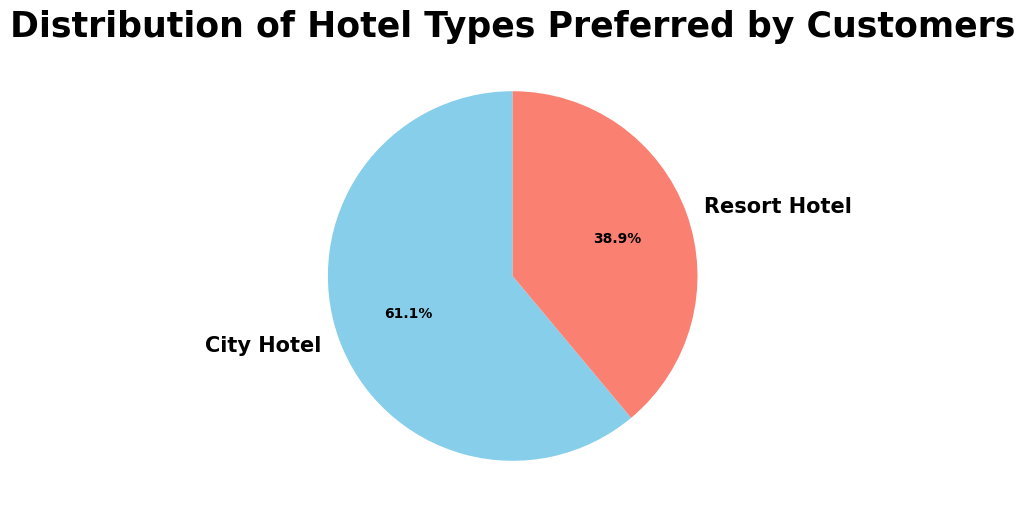

In [125]:


# Count bookings per hotel type
hotel_counts = h1_df['hotel'].value_counts()

# Create pie chart
plt.figure(figsize=(8,6))
plt.pie(
    hotel_counts,
    labels=hotel_counts.index,
    autopct='%1.1f%%',  # show percentages
    colors=['skyblue', 'salmon'],  # you can change colors
    startangle=90
)
plt.title('Distribution of Hotel Types Preferred by Customers')
plt.show()


### 2. What is/are the insight(s) found from the chart?
To kick-start our analysis on the specific needs of our customers, we conducted a univariate analysis on the hotel type. The results revealed that the majority of customers prefer City Hotels over Resort Hotels.

#### City Hotel:
Located in urban areas, catering primarily to business travelers with essential amenities like Wi-Fi and meeting rooms.

#### Resort Hotel:
Situated in vacation destinations, offering extensive recreational facilities for leisure travelers.

### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We observed that 61% of our customers prefer city hotels over resorts. This is positive for our business, but it doesn't mean we should neglect the resort segment. While resort hotels are performing well, they require certain improvements to meet customer needs better, which we will address in due course.

## **Booking Analysis**

### What are the booking trends over time? Are there any seasonal patterns?

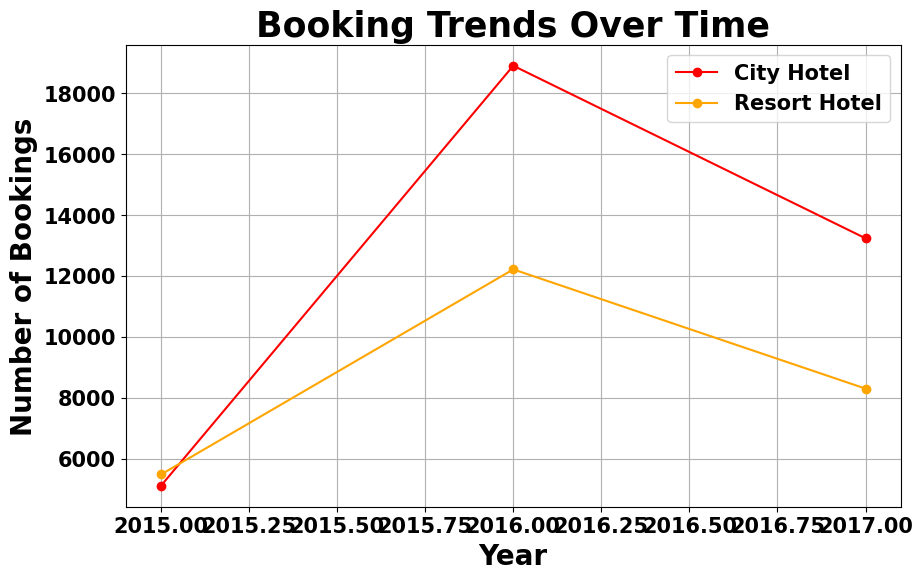

In [126]:


# Filter for non-cancelled bookings
city_hotel = h1_df[(h1_df['hotel'] == 'City Hotel') & (h1_df['is_canceled'] == 0)]
resort_hotel = h1_df[(h1_df['hotel'] == 'Resort Hotel') & (h1_df['is_canceled'] == 0)]

# Count bookings per year
city_counts = city_hotel.groupby('arrival_date_year').size()
resort_counts = resort_hotel.groupby('arrival_date_year').size()

# Plot
plt.figure(figsize=(10,6))
plt.plot(city_counts.index, city_counts.values, marker='o', label='City Hotel', color='red')
plt.plot(resort_counts.index, resort_counts.values, marker='o', label='Resort Hotel', color='orange')

plt.title('Booking Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Bookings')
plt.legend()
plt.grid(True)
plt.show()


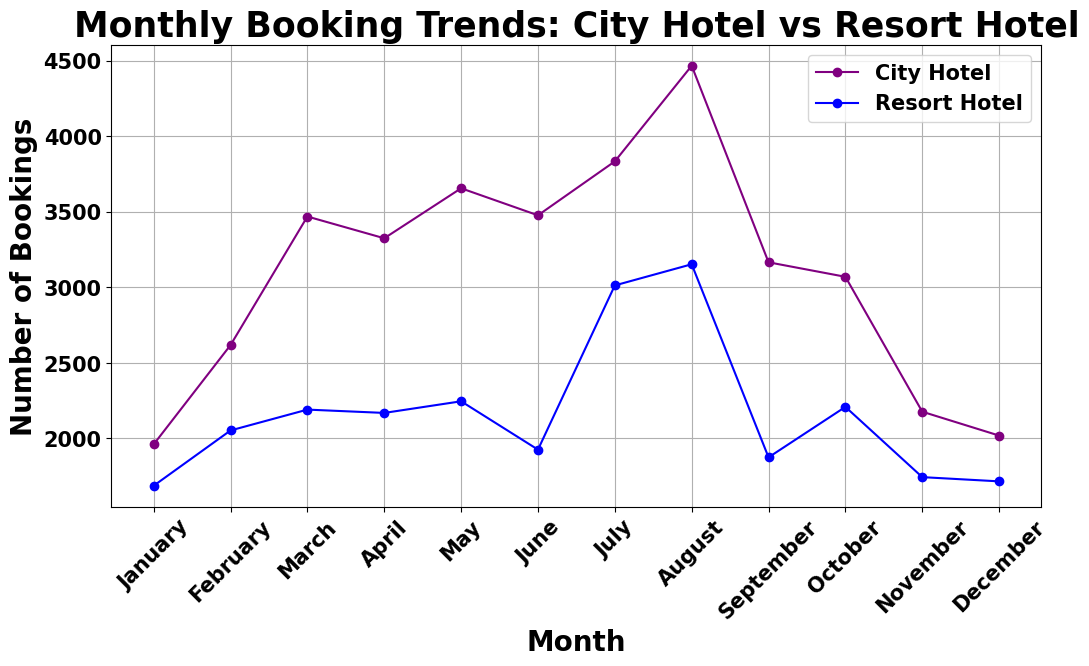

In [127]:
import matplotlib.pyplot as plt

# Filter non-cancelled bookings
city_hotel = h1_df[(h1_df['hotel'] == 'City Hotel') & (h1_df['is_canceled'] == 0)]
resort_hotel = h1_df[(h1_df['hotel'] == 'Resort Hotel') & (h1_df['is_canceled'] == 0)]

# Count bookings per month
city_counts = city_hotel['arrival_date_month'].value_counts()
resort_counts = resort_hotel['arrival_date_month'].value_counts()

# Sort months properly
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                'July', 'August', 'September', 'October', 'November', 'December']
city_counts = city_counts.reindex(months_order)
resort_counts = resort_counts.reindex(months_order)

# Plot
plt.figure(figsize=(12,6))
plt.plot(city_counts.index, city_counts.values, marker='o', label='City Hotel', color='purple')
plt.plot(resort_counts.index, resort_counts.values, marker='o', label='Resort Hotel', color='blue')

plt.title('Monthly Booking Trends: City Hotel vs Resort Hotel')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


### How do booking trends differ between weekdays and weekends

In [128]:
# Create counts for weekend and weekday stays

city_weekend = h1_df[(h1_df['hotel'] == 'City Hotel') &
                     (h1_df['stays_in_weekend_nights'] > 0)].shape[0]

city_week = h1_df[(h1_df['hotel'] == 'City Hotel') &
                  (h1_df['stays_in_week_nights'] > 0)].shape[0]

resort_weekend = h1_df[(h1_df['hotel'] == 'Resort Hotel') &
                       (h1_df['stays_in_weekend_nights'] > 0)].shape[0]

resort_week = h1_df[(h1_df['hotel'] == 'Resort Hotel') &
                    (h1_df['stays_in_week_nights'] > 0)].shape[0]

city_weekend, city_week, resort_weekend, resort_week


(30113, 49537, 22059, 31581)

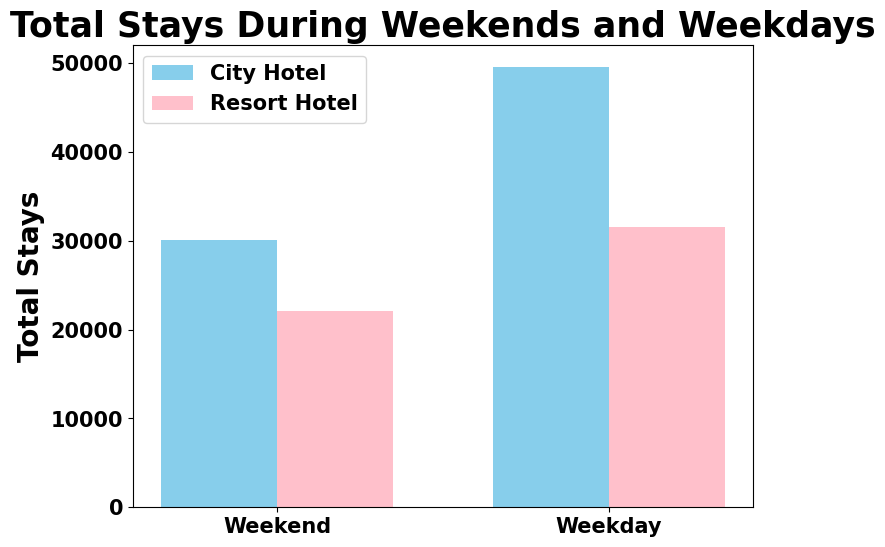

In [129]:
import matplotlib.pyplot as plt

# Data (same as before)
periods = ['Weekend', 'Weekday']
city_stays = [city_weekend, city_week]
resort_stays = [resort_weekend, resort_week]

# Plot side-by-side bars
plt.figure(figsize=(8,6))
bar_width = 0.35
x = [0, 1]

plt.bar(x, city_stays, width=bar_width, label='City Hotel', color='skyblue')
plt.bar([i + bar_width for i in x], resort_stays, width=bar_width, label='Resort Hotel', color='pink')

plt.xticks([i + bar_width/2 for i in x], periods)
plt.ylabel('Total Stays')
plt.title('Total Stays During Weekends and Weekdays')
plt.legend()
plt.show()


#### Which agent made most booking

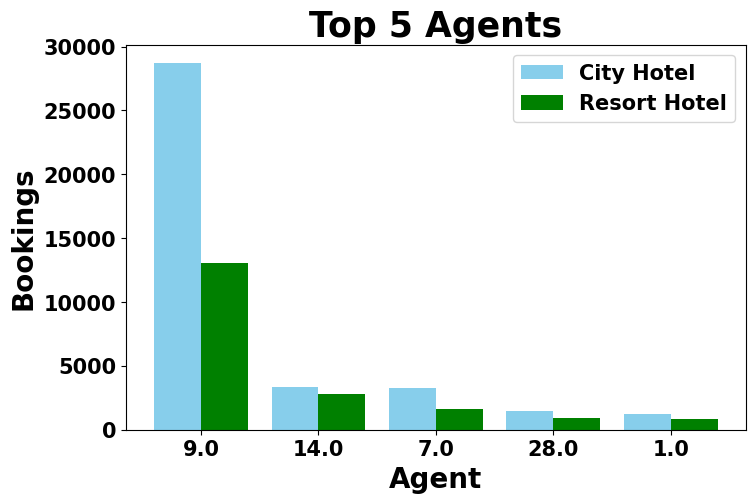

In [130]:
import matplotlib.pyplot as plt
# Count bookings per agent
data = h1_df.groupby(['hotel', 'agent']).size().reset_index(name='count')

# Remove agent = 0
data = data[data['agent'] != 0]

# Top 5 agents for each hotel
city = data[data['hotel'] == 'City Hotel'].sort_values('count', ascending=False).head(5)
resort = data[data['hotel'] == 'Resort Hotel'].sort_values('count', ascending=False).head(5)

# Plot
plt.figure(figsize=(8,5))
x = range(5)

plt.bar(x, city['count'], width=0.4, color='skyblue', label='City Hotel')
plt.bar([i+0.4 for i in x], resort['count'], width=0.4, color='green', label='Resort Hotel')

plt.xticks([i+0.2 for i in x], city['agent'])
plt.xlabel('Agent')
plt.ylabel('Bookings')
plt.title('Top 5 Agents')
plt.legend()
plt.show()


## **Insights**
Based on the booking trends, we can clearly see a significant spike in bookings between 2015 and 2016, followed by a gradual decrease between 2016 and 2017. This fluctuation could be attributed to various events or factors specific to those years.

Furthermore, an analysis of monthly booking patterns reveals that the highest number of bookings occurred from May to August, which aligns with the peak summer season. This seasonal trend is consistent with increased travel and vacation activities during this period.

When comparing bookings made on weekdays versus weekends, the data shows a substantial difference. Approximately 30,000 bookings were made on weekdays, while weekends saw about 80,000 bookings for both city and resort destinations.

Lastly, an evaluation of our agents' performance revealed that Agent 9 made an impressive 28,000 bookings, significantly outpacing Agent 240, who made 13,000 bookings for resorts. This indicates a notable difference in performance among our agents.

### **Customer Demographics**

#### What are the demographics of the customers (e.g., age, gender, nationality)?

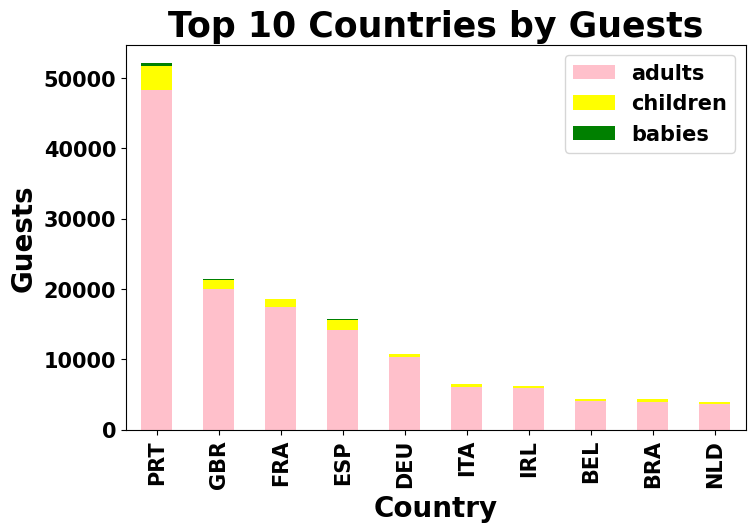

In [131]:


g = h1_df.groupby('country')[['adults','children','babies']].sum()
top10 = g.sort_values(by='adults', ascending=False).head(10)

top10.plot(kind='bar', stacked=True,
           color=['pink','yellow','green'],
           figsize=(8,5))

plt.title('Top 10 Countries by Guests')
plt.xlabel('Country')
plt.ylabel('Guests')
plt.show()


### What are Types of Customers?

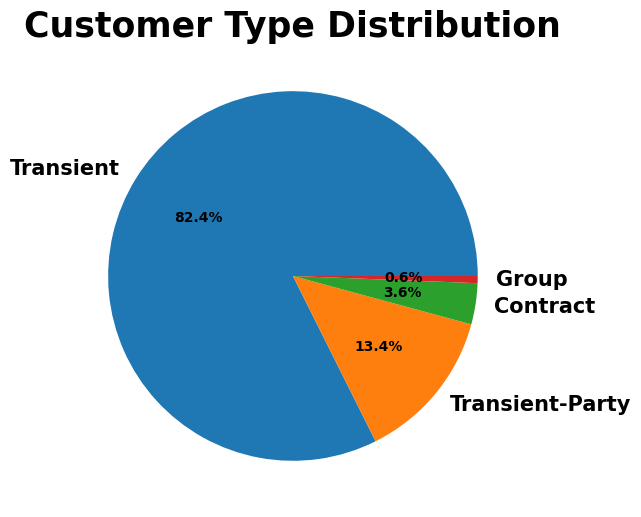

In [132]:
import matplotlib.pyplot as plt

counts = h1_df['customer_type'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Customer Type Distribution')
plt.show()


### What is the Percentage of repeated Guest?

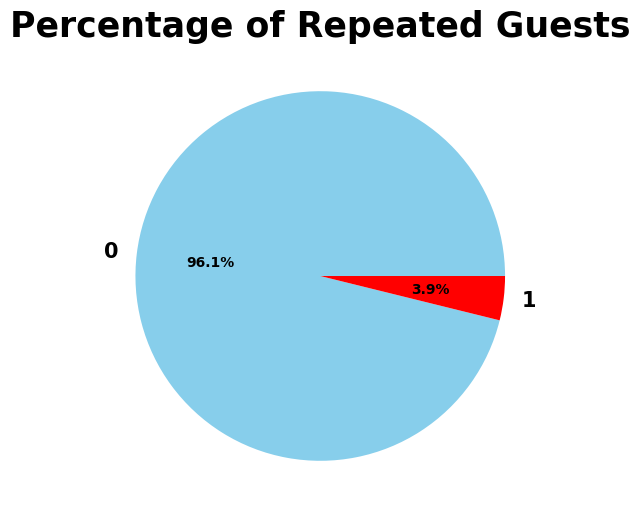

In [133]:


counts = h1_df['is_repeated_guest'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    counts,
    labels=counts.index,
    autopct='%1.1f%%',
    colors=['skyblue', 'red']   # changed colors
)
plt.title('Percentage of Repeated Guests')
plt.show()


### Insights
One of the main objectives of this analysis was to understand customer demographics. After a thorough analysis, we found that the majority of guests traveled from Portugal, followed by the UK and France. This insight provides a clear direction on prioritizing our marketing efforts towards these countries to enhance business growth.

Additionally, we examined the distribution of customer types. Transient customers accounted for a high volume of bookings at 82%, followed by Transient Party customers at 13%. This information helps us focus our marketing strategies on the most significant customer segments.

Moreover, the data indicates that new guests have a higher booking rate compared to repeat guests. This highlights a potential area of neglect towards our existing customers, suggesting a need for strategies to improve customer retention alongside attracting new guests.

### **Customer Preferences**
#### Which room types are most preferred by customers?

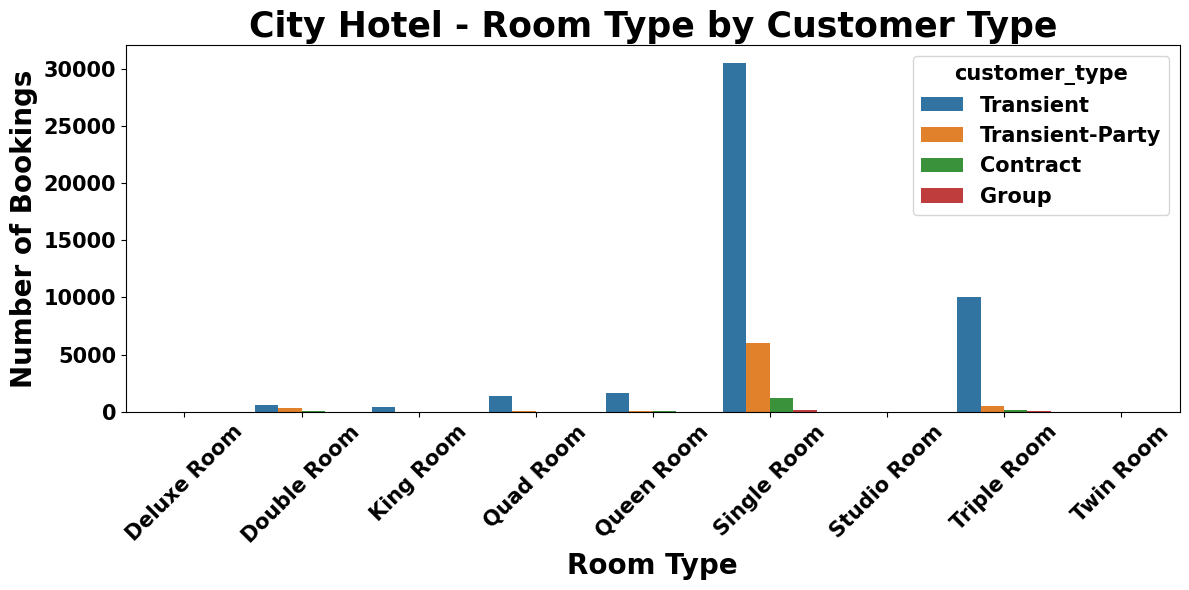

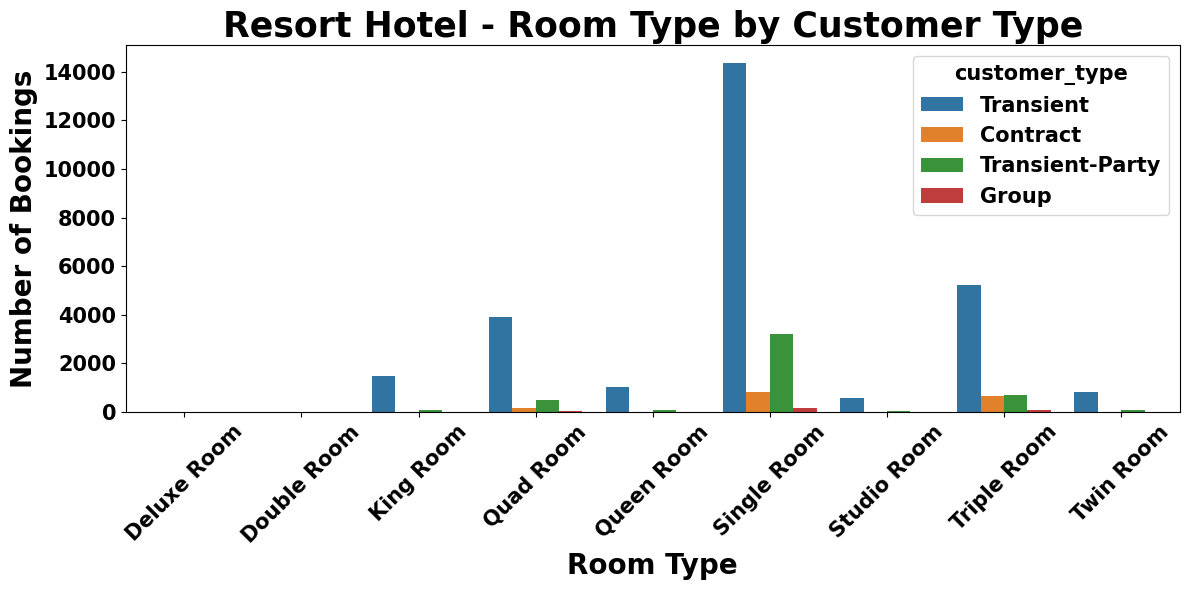

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt

# Room type order
room_order = sorted(h1_df['reserved_room_type'].unique())

# -------------------- City Hotel --------------------
plt.figure(figsize=(12,6))
sns.countplot(
    data=h1_df[h1_df['hotel'] == 'City Hotel'],
    x='reserved_room_type',
    hue='customer_type',
    order=room_order
)

plt.title('City Hotel - Room Type by Customer Type')
plt.xlabel('Room Type')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# -------------------- Resort Hotel --------------------
plt.figure(figsize=(12,6))
sns.countplot(
    data=h1_df[h1_df['hotel'] == 'Resort Hotel'],
    x='reserved_room_type',
    hue='customer_type',
    order=room_order
)

plt.title('Resort Hotel - Room Type by Customer Type')
plt.xlabel('Room Type')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### What are the most common special requests made by customers (e.g., early check-in, late check-out)?

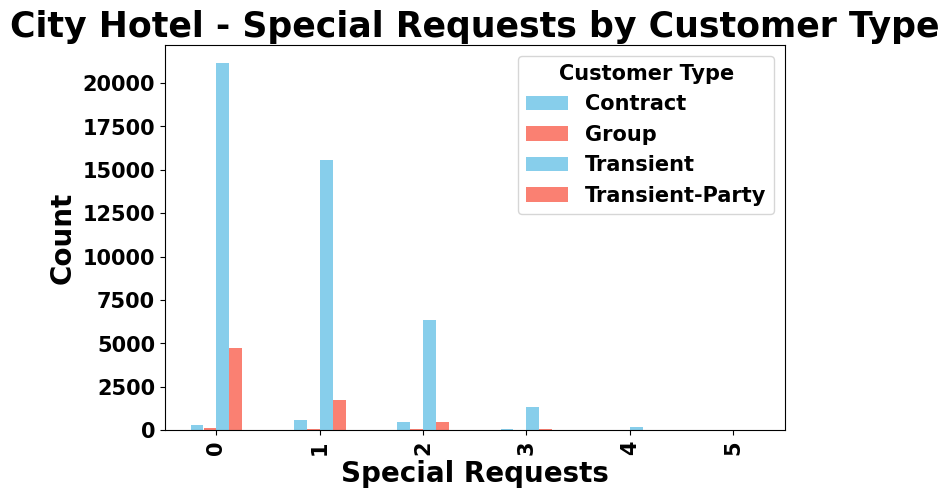

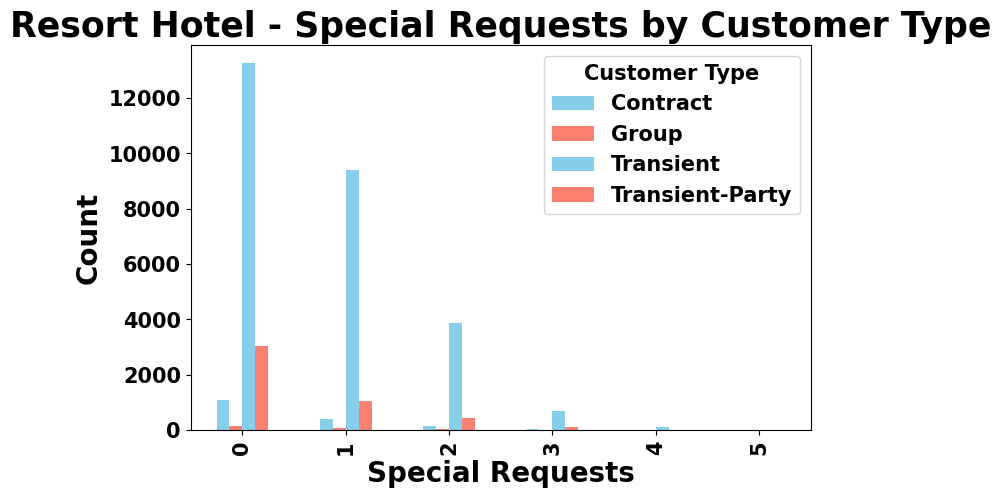

In [135]:
import matplotlib.pyplot as plt

# City Hotel
city = h1_df[h1_df['hotel'] == 'City Hotel']
city_counts = city.groupby(['total_of_special_requests','customer_type']).size().unstack(fill_value=0)

city_counts.plot(kind='bar', figsize=(8,5), color=['skyblue','salmon'])
plt.title('City Hotel - Special Requests by Customer Type')
plt.xlabel('Special Requests')
plt.ylabel('Count')
plt.legend(title='Customer Type')
plt.show()

# Resort Hotel
resort = h1_df[h1_df['hotel'] == 'Resort Hotel']
resort_counts = resort.groupby(['total_of_special_requests','customer_type']).size().unstack(fill_value=0)

resort_counts.plot(kind='bar', figsize=(8,5), color=['skyblue','salmon'])
plt.title('Resort Hotel - Special Requests by Customer Type')
plt.xlabel('Special Requests')
plt.ylabel('Count')
plt.legend(title='Customer Type')
plt.show()


### **Insights**
When initiating our analysis, we encountered several constraints pertinent to hotel bookings. Among these, customer preferences emerged as a significant factor. Our analysis revealed that a substantial portion of preferences leaned towards single-room accommodations. Approximately 40,000 bookings were observed for city-type hotels, whereas resort-type hotels accounted for around 17,000 bookings in this category.

Furthermore, our investigation unearthed a prevalent customer request, indicating a distinct inclination towards early check-in and late check-out options. This preference aligns with the desire for added flexibility and convenience during their stay, showcasing the importance of accommodating such requests to enhance overall guest satisfaction and experience.

### **Cancellation Analysis**
#### What is the percentage of cancellation

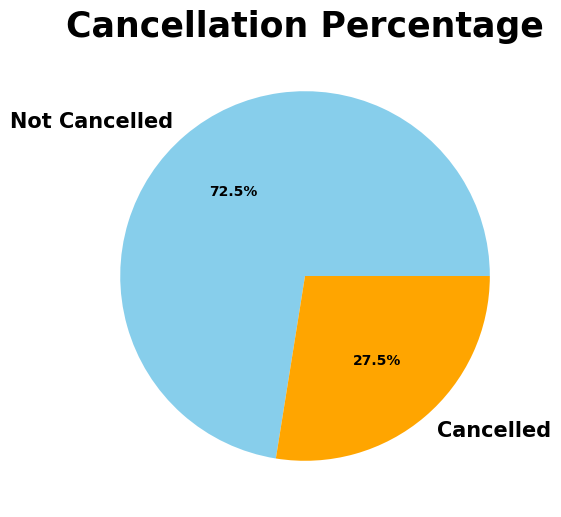

In [136]:
import matplotlib.pyplot as plt

# Replace values for readability
h1_df['is_canceled'] = h1_df['is_canceled'].replace({0: 'Not Cancelled', 1: 'Cancelled'})

# Count cancellations
hotel_can = h1_df['is_canceled'].value_counts()

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(hotel_can, labels=hotel_can.index, autopct='%1.1f%%', colors=['skyblue','orange'])
plt.title('Cancellation Percentage')
plt.show()


#### What is the cancellation rate, and how does it vary across different factors (e.g., booking lead time, room type)?

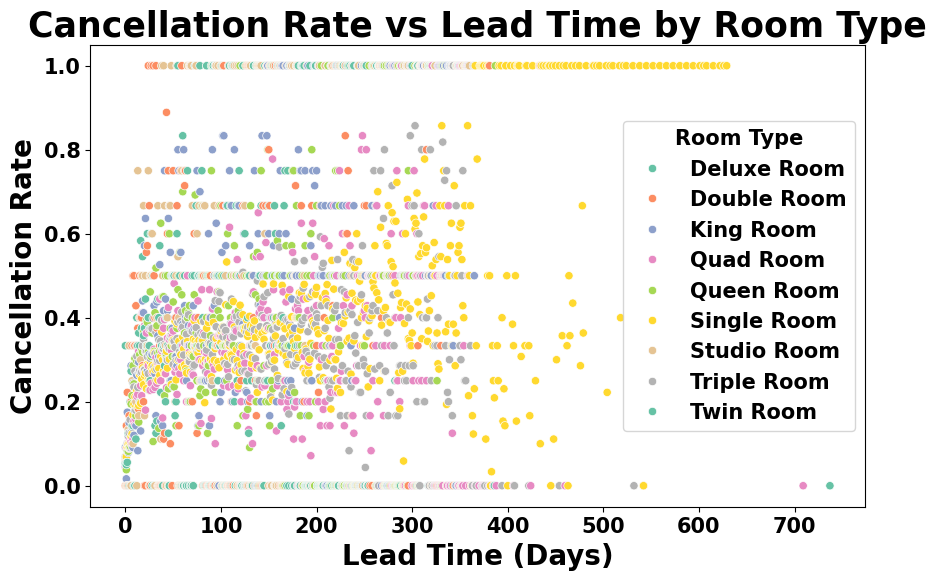

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns

# Map cancellation to 0/1
h1_df['is_cancelled_copy'] = h1_df['is_canceled'].map({'Not Cancelled': 0, 'Cancelled': 1})

# Calculate cancellation rate by lead_time and room type
combined = h1_df.groupby(['lead_time','reserved_room_type'])['is_cancelled_copy'].mean().reset_index()

# Scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=combined, x='lead_time', y='is_cancelled_copy', hue='reserved_room_type', palette='Set2')
plt.title('Cancellation Rate vs Lead Time by Room Type')
plt.xlabel('Lead Time (Days)')
plt.ylabel('Cancellation Rate')
plt.legend(title='Room Type')
plt.show()


### Insights
One of the major concerns in the hotel industry is cancellations, which can significantly impact operations. After conducting a thorough analysis, we found that the cancellation rate is currently 27%, which is an improvement compared to previous years. An interesting insight from our analysis is that cancellations are more frequent for Single rooms, particularly when the lead time (the time between booking and the stay) ranges from 100 to 400 days.

### Revenue Analysis
##### What is the average daily rate (ADR) and revenue per available room (RevPAR)

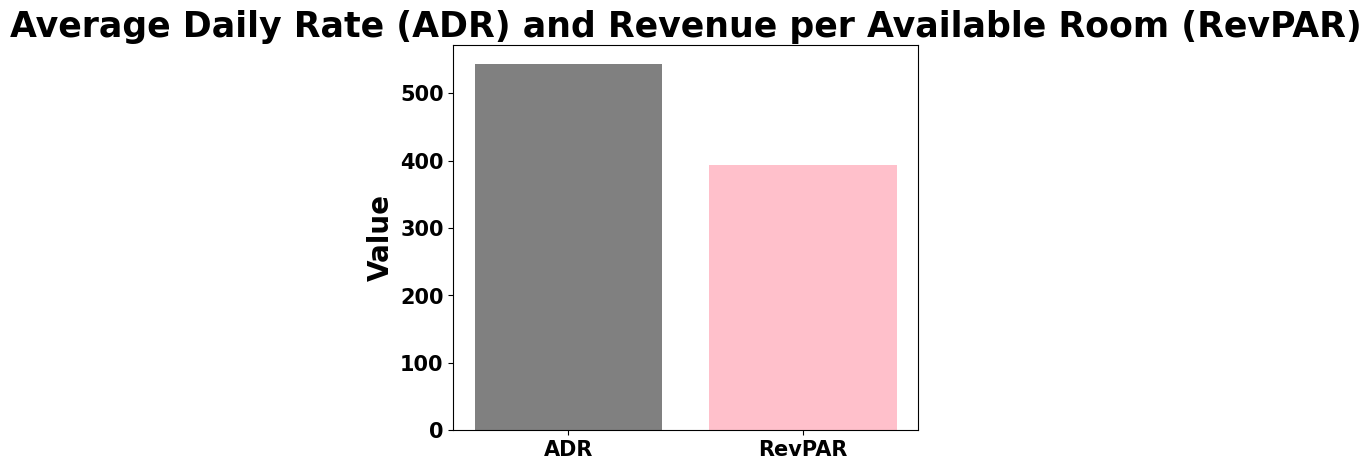

In [138]:
import matplotlib.pyplot as plt

# Calculate ADR and RevPAR
total_room_revenue = h1_df['adr'] * (h1_df['stays_in_weekend_nights'] + h1_df['stays_in_week_nights'])
total_rooms_sold = h1_df['is_cancelled_copy'].value_counts().get(0, 0)
total_available_rooms = h1_df['reserved_room_type'].value_counts().sum()

adr = int(total_room_revenue.sum() / total_rooms_sold)
revpar = int(total_room_revenue.sum() / total_available_rooms)

# Metrics and values
metrics = ['ADR', 'RevPAR']
values = [adr, revpar]

# Plot
plt.figure(figsize=(6,5))
plt.bar(metrics, values, color=['gray', 'pink'])
plt.title('Average Daily Rate (ADR) and Revenue per Available Room (RevPAR)')
plt.ylabel('Value')
plt.show()


### How does revenue vary across different room types, customer segments

In [139]:
h1_df['total_room_revenue'] = h1_df['adr'] * (h1_df['stays_in_weekend_nights'] + h1_df['stays_in_week_nights'])
     

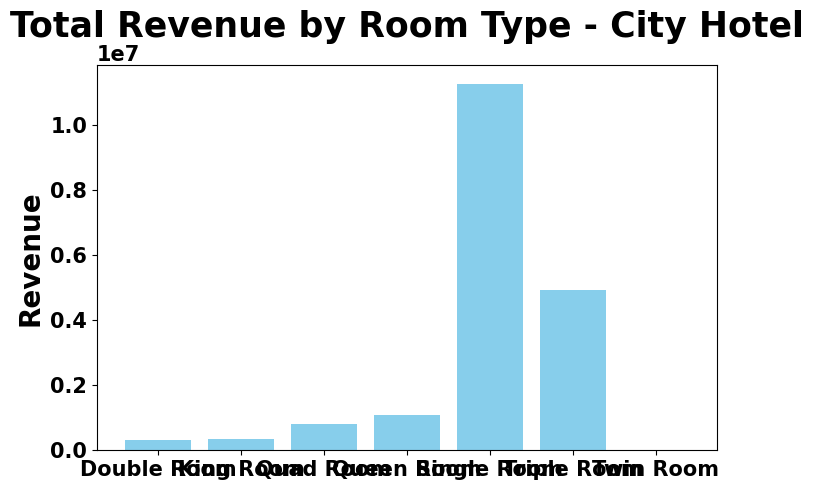

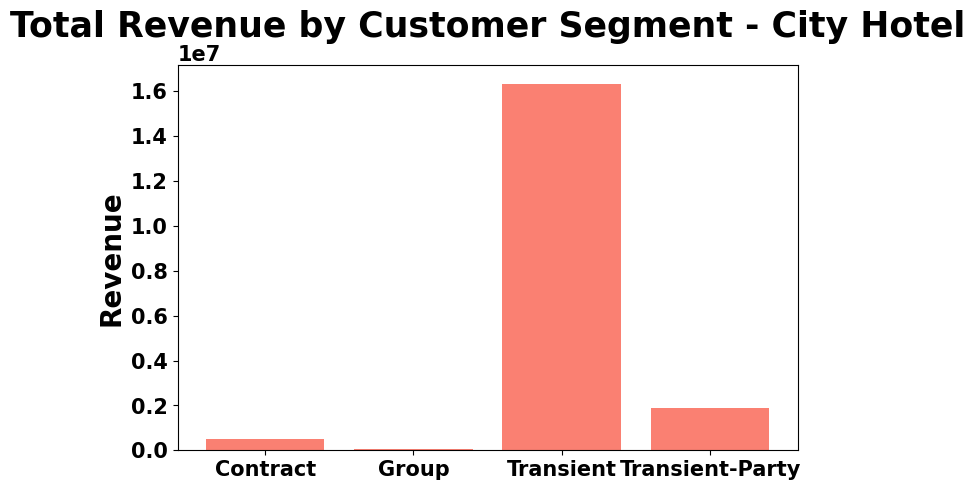

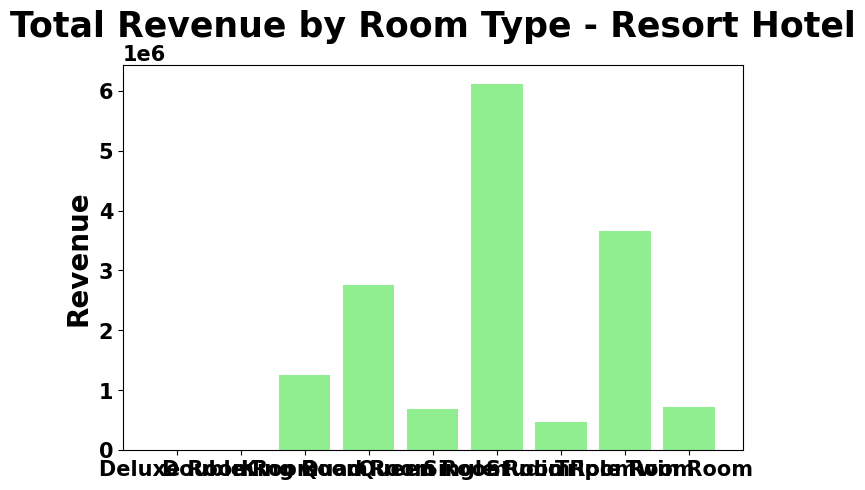

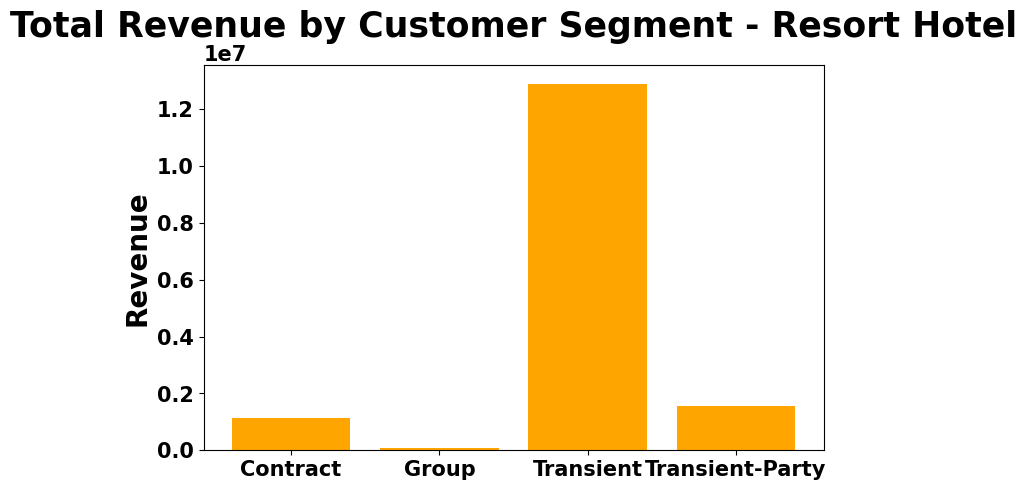

In [140]:
import matplotlib.pyplot as plt

# Filter hotels
city_hotel = h1_df[h1_df['hotel'] == 'City Hotel']
resort_hotel = h1_df[h1_df['hotel'] == 'Resort Hotel']

# Calculate total revenue
room_revenue_city = city_hotel.groupby('reserved_room_type')['total_room_revenue'].sum()
customer_revenue_city = city_hotel.groupby('customer_type')['total_room_revenue'].sum()

room_revenue_resort = resort_hotel.groupby('reserved_room_type')['total_room_revenue'].sum()
customer_revenue_resort = resort_hotel.groupby('customer_type')['total_room_revenue'].sum()

# Plot City Hotel - Room Type
plt.figure(figsize=(8,5))
plt.bar(room_revenue_city.index, room_revenue_city.values, color='skyblue')
plt.title('Total Revenue by Room Type - City Hotel')
plt.ylabel('Revenue')
plt.show()

# Plot City Hotel - Customer Segment
plt.figure(figsize=(8,5))
plt.bar(customer_revenue_city.index, customer_revenue_city.values, color='salmon')
plt.title('Total Revenue by Customer Segment - City Hotel')
plt.ylabel('Revenue')
plt.show()

# Plot Resort Hotel - Room Type
plt.figure(figsize=(8,5))
plt.bar(room_revenue_resort.index, room_revenue_resort.values, color='lightgreen')
plt.title('Total Revenue by Room Type - Resort Hotel')
plt.ylabel('Revenue')
plt.show()

# Plot Resort Hotel - Customer Segment
plt.figure(figsize=(8,5))
plt.bar(customer_revenue_resort.index, customer_revenue_resort.values, color='orange')
plt.title('Total Revenue by Customer Segment - Resort Hotel')
plt.ylabel('Revenue')
plt.show()


### **Insights**
The revenue analysis reveals compelling insights into the performance and dynamics of the hospitality business:

The Average Daily Rate (ADR) and Revenue per Available Room (RevPAR) stand out as key indicators of financial health, with ADR averaging 544 million and RevPAR totaling 394 million. These figures reflect the revenue generated per room and highlight the overall profitability of the establishment.

When examining revenue by room type, single rooms emerge as significant contributors, generating approximately $112 million. This underscores the popularity and demand for single-room accommodations among guests, emphasizing the importance of catering to this segment's preferences.

Furthermore, customer type preferences play a pivotal role in revenue generation, particularly with transient guests. In the resort segment, transient guests contribute substantially, accounting for $128 million in revenue. This underscores the importance of understanding and catering to the needs and preferences of transient guests to capitalize on revenue opportunities effectively.

These insights provide valuable guidance for strategic decision-making, enabling hoteliers to optimize revenue streams, enhance guest satisfaction, and tailor services to meet the diverse needs of their clientele.

### **Performance Meterics**
#### What is the occupancy rate, and how does it fluctuate over time


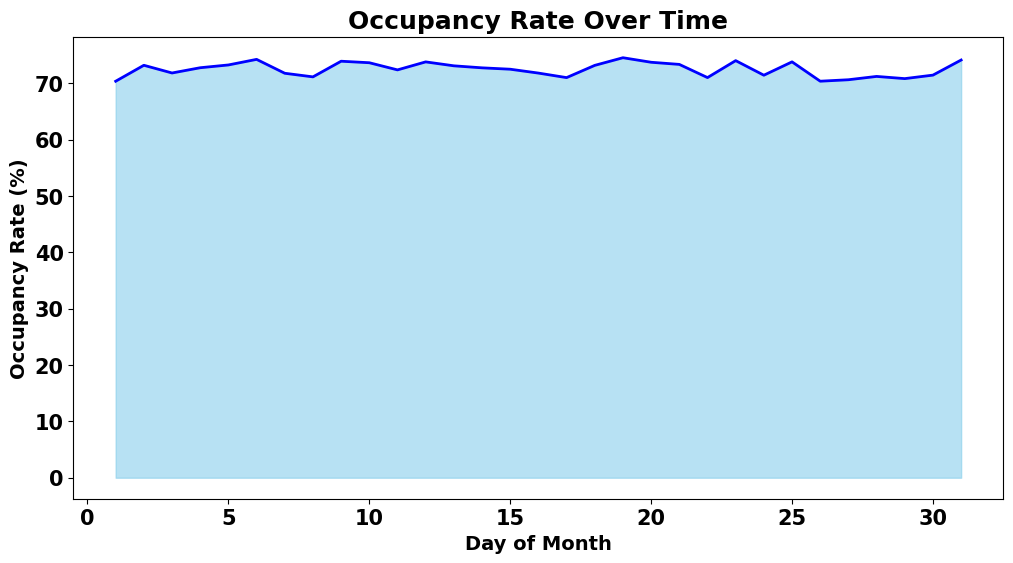

In [141]:
import matplotlib.pyplot as plt

# Calculate occupancy rate
occupancy_rate = h1_df.groupby('arrival_date_day_of_month')['is_cancelled_copy'].mean()
occupancy_rate = (1 - occupancy_rate) * 100

# Plot area chart
plt.figure(figsize=(12,6))
plt.fill_between(occupancy_rate.index, occupancy_rate.values, color='skyblue', alpha=0.6)
plt.plot(occupancy_rate.index, occupancy_rate.values, color='blue', linewidth=2)
plt.title('Occupancy Rate Over Time', fontsize=18, fontweight='bold')
plt.xlabel('Day of Month', fontsize=14)
plt.ylabel('Occupancy Rate (%)', fontsize=14)
plt.grid(False)
plt.show()


### What is the ratio of total stays and adr

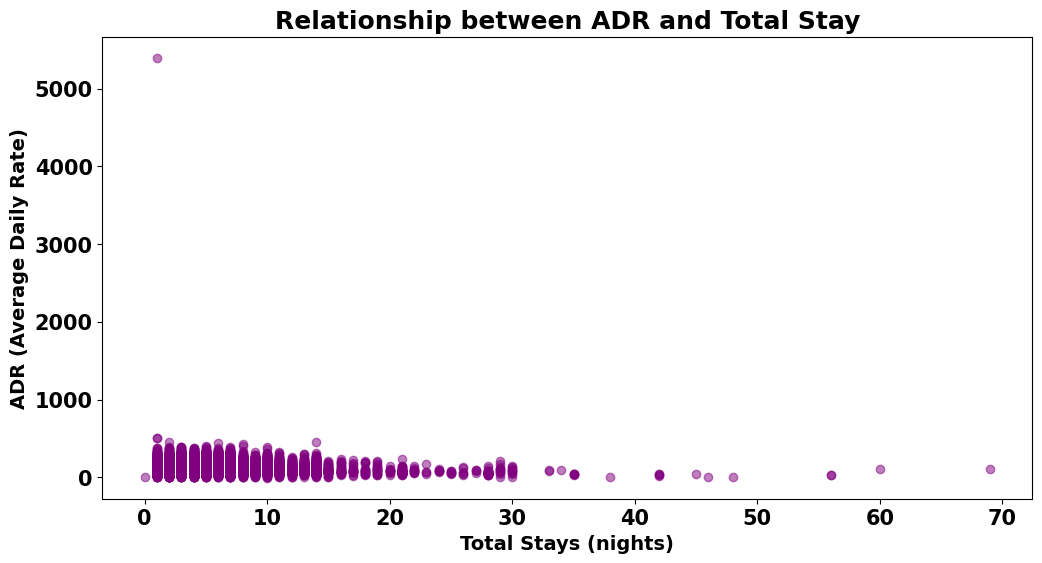

In [142]:
# Create total_stays column if not already
h1_df['total_stays'] = h1_df['stays_in_weekend_nights'] + h1_df['stays_in_week_nights']

# Now group data for plotting
adr_vs_stay = h1_df.groupby(['total_stays', 'adr']).size().reset_index(name='Number of stays')

# Plot using matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.scatter(adr_vs_stay['total_stays'], adr_vs_stay['adr'], alpha=0.5, color='purple')
plt.title('Relationship between ADR and Total Stay', fontsize=18, fontweight='bold')
plt.xlabel('Total Stays (nights)', fontsize=14)
plt.ylabel('ADR (Average Daily Rate)', fontsize=14)
plt.grid(False)
plt.show()


In [143]:
# Create total_people column
h1_df['total_people'] = h1_df['adults'] + h1_df['children'] + h1_df['babies']


### ADR vs Total Number of People

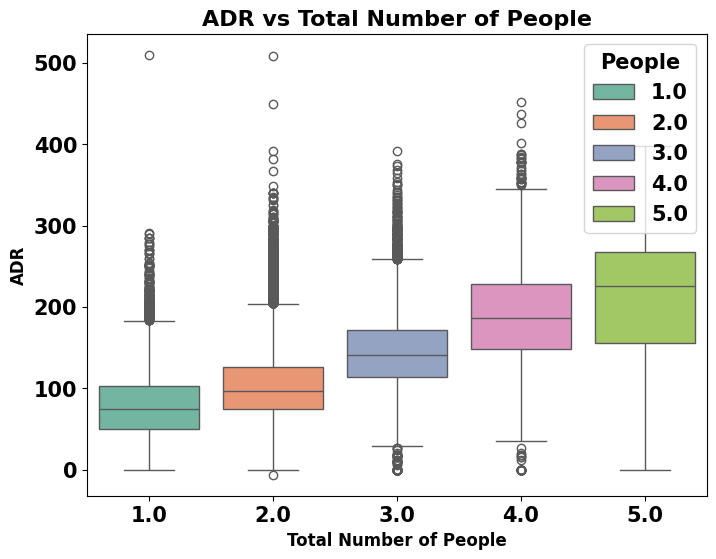

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure total_people exists
h1_df['total_people'] = h1_df['adults'] + h1_df['children'] + h1_df['babies']

# Filter data
df2 = h1_df[(h1_df['total_people'] < 6) & (h1_df['adr'] <= 1000)]

# Box plot with different colors
plt.figure(figsize=(8, 6))
sns.boxplot(x='total_people', y='adr', data=df2, hue='total_people', palette='Set2', dodge=False)

plt.title('ADR vs Total Number of People', fontsize=16)
plt.xlabel('Total Number of People', fontsize=12)
plt.ylabel('ADR', fontsize=12)
plt.legend(title='People', loc='upper right')

plt.show()


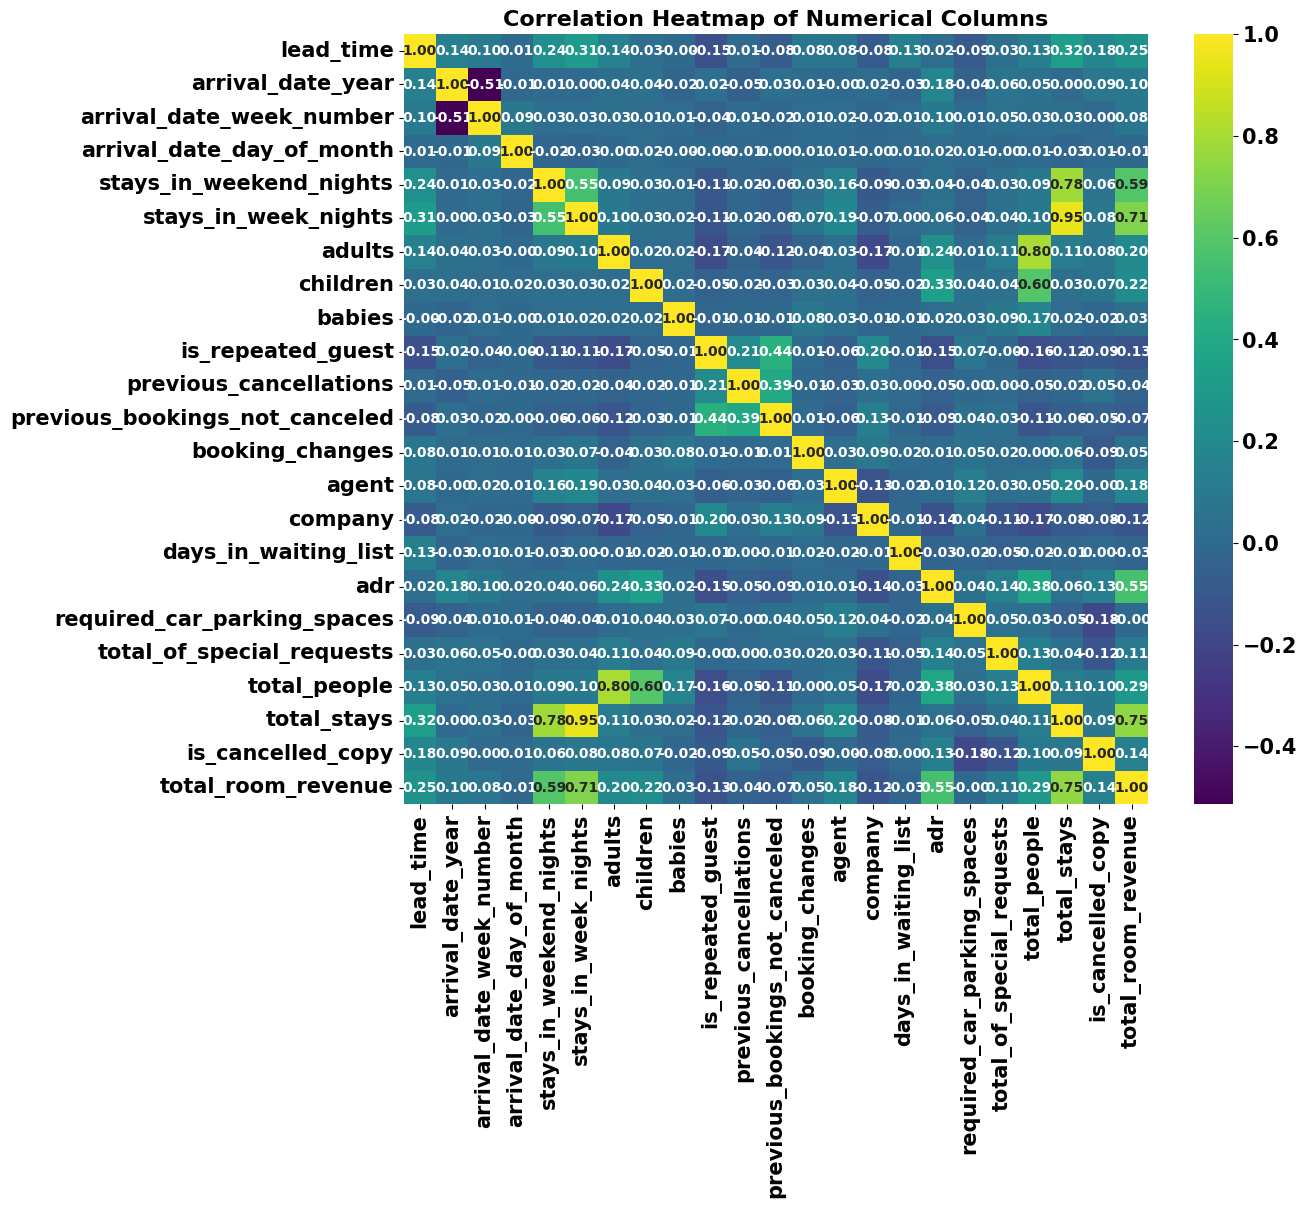

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns
numerical_columns = h1_df.select_dtypes(include=['number'])

# Set figure size
plt.figure(figsize=(12, 10))

# Plot correlation heatmap
sns.heatmap(numerical_columns.corr(), 
            annot=True,       # Show correlation values
            fmt=".2f",        # Format numbers to 2 decimals
            cmap='viridis',   # Color map
            cbar=True)        # Show color bar

plt.title('Correlation Heatmap of Numerical Columns', fontsize=16)
plt.show()


## **Business Insights from Exploratory Data Analysis**

1. A high number of bookings are canceled when the lead time is very high.
2. City hotels experience more cancellations compared to resort hotels.
3. Most bookings occur during peak seasonal months, indicating strong seasonality in demand.
4. Customers with no deposit type are more likely to cancel bookings.
5. Repeated guests are less likely to cancel compared to new customers.
6. Longer waiting list days increase the probability of cancellation.


## **5. Solution to Business Objective**
### What do you suggest the client to achieve Business Objective ?

To achieve the business objective of improving hotel revenue, reducing cancellations, and increasing customer satisfaction, the following practical strategies are recommended based on the data analysis:

### Enhance Customer Experience and Loyalty Programs

Hotels should develop strong loyalty programs that reward repeat guests with personalized offers, discounts, and better services. Collecting guest feedback and acting on it can continuously improve service quality. Personalized marketing campaigns targeting previous guests can encourage repeat visits.

### Flexible Booking Policies – Reduce Cancellation Rates

Introduce flexible booking and modification options without heavy penalties. Provide incentives such as discounts on future stays or complimentary services to guests who maintain their bookings. This helps reduce cancellation rates.

### Leverage Booking Channels – Strengthen Travel Agent Relationships

Build stronger partnerships with travel agents, tour operators, and OTA platforms by offering exclusive deals and better commissions. Promote the hotel through these channels to reach a wider audience and increase bookings.

### Optimize Revenue Management – Maximize ADR and Revenue

Use dynamic pricing strategies based on demand and seasonality. Upsell additional services, meal plans, and premium rooms during booking and stay to increase the Average Daily Rate (ADR) and overall revenue.

### Focus on High-Demand Markets – Target High-Potential Regions

Increase marketing efforts in regions with a high number of guests, such as Portugal, and explore other potential markets using travel trend analysis to diversify the customer base.

### Improve Operational Efficiency – Reduce Waiting Times

Adopt technology like mobile check-ins and automated kiosks to streamline operations. Ensure proper staff allocation during peak seasons to handle high guest inflow efficiently.

### Enhance Customer Flexibility – Accommodate Booking Changes

Allow easy booking modifications such as date or room changes. This flexibility improves customer satisfaction and reduces complete cancellations.

Boost Resort Hotel Bookings

Promote the unique experiences of Resort hotels through targeted marketing campaigns to increase their occupancy and attract leisure travelers.

Optimize Stay Durations

Offer attractive packages and discounts for short stays (less than 7 days) and promote week-long stays with value-added services for both business and leisure travelers.

### Enhance Communication and Transparency

Maintain clear communication about room availability. If the reserved room is unavailable, offer upgrades or complimentary services to avoid dissatisfaction and cancellations.

These solutions collectively help hotels improve customer retention, reduce revenue loss, optimize pricing, and enhance overall business performance.

## **Conclusion**
This project focuses on analyzing the Hotel Booking Demand dataset using Exploratory Data Analysis (EDA) to understand how various factors affect hotel bookings, cancellations, customer behavior, and revenue generation for both City Hotels and Resort Hotels.

Initially, the dataset was cleaned using Excel to handle missing values, remove unnecessary columns, and prepare a structured dataset for analysis. After preprocessing, the clean dataset was imported into Python for detailed analysis using powerful libraries such as Pandas, Matplotlib, Seaborn, and Plotly. Basic data exploration techniques like checking dataset shape, data types, missing values, and statistical summaries helped in understanding the nature and distribution of the data.

Through comprehensive visual and statistical analysis, several meaningful patterns were discovered. One of the key findings was that booking cancellations are strongly related to lead time. Customers who make bookings well in advance tend to cancel more frequently compared to those who book closer to their stay date. This insight is crucial for hotels to design better booking and cancellation policies.

A comparative analysis between City Hotels and Resort Hotels showed that City Hotels receive a higher number of bookings but also experience a higher cancellation rate. Seasonal trend analysis indicated that the months of July and August are peak booking periods with a higher Average Daily Rate (ADR), while certain months show low occupancy, indicating off-season trends that affect revenue.

Country-wise booking analysis revealed that a significant number of guests come from Portugal (PRT), identifying it as a major source market. Market segment analysis highlighted that most bookings are made through Online Travel Agencies (OTA), emphasizing the growing importance of online platforms in the hospitality industry.

The analysis also demonstrated that repeat guests are less likely to cancel bookings, which underlines the importance of customer loyalty and retention strategies. Additionally, studying room type and meal preferences provided insights into customer choices, helping hotels design better service packages and promotional offers.

ADR variation across different months and hotel types clearly showed that pricing is directly influenced by demand, supporting the need for dynamic pricing strategies. The impact of deposit type on cancellations was also observed, where customers with no deposit were more likely to cancel.

Based on these analytical findings, several practical business recommendations were proposed. These include implementing loyalty programs to retain repeat customers, encouraging deposit-based bookings to reduce cancellations, strengthening relationships with travel agencies, focusing marketing efforts on high-demand countries, promoting resort hotels during off-seasons, and optimizing pricing strategies according to demand patterns.